In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "Housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data('/Users/vercetti/Desktop/Проекты Python/hands-on-ml')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


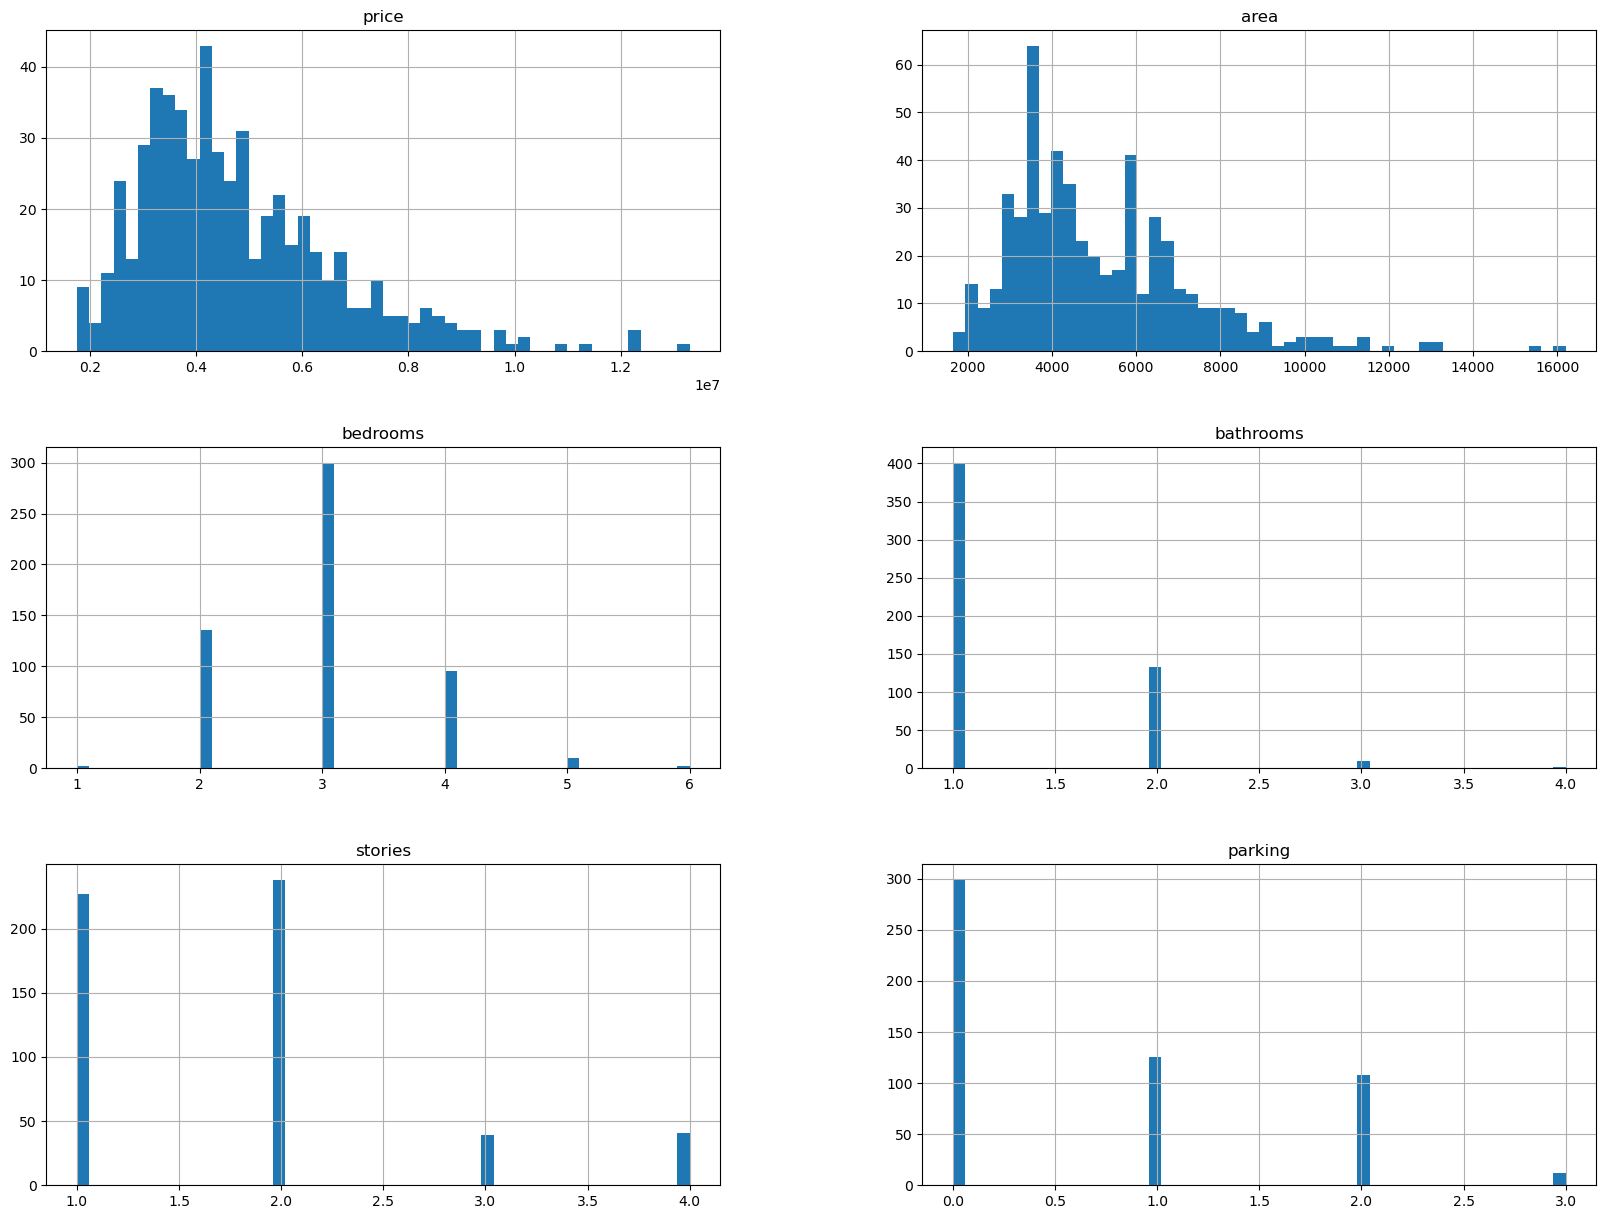

In [ ]:
%matplotlib inline

housing.hist(bins=50, figsize=(20,15))
plt.show()

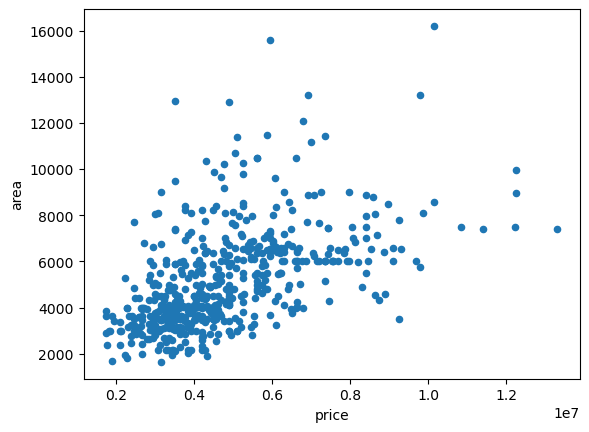

In [17]:
housing.plot(kind='scatter', x='price', y='area')
plt.show()

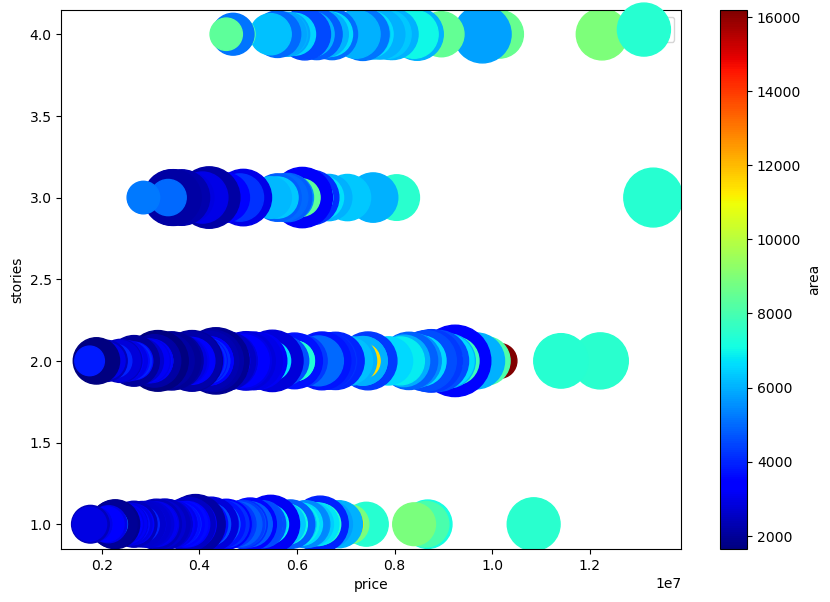

In [22]:
housing.plot(kind='scatter', x='price', y='stories', s=housing['price'] / housing['area'],
    label='', figsize=(10, 7), c='area', cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.show()

In [28]:
num_attr = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
corr_matrix = housing[num_attr].corr()
corr_matrix['price'].sort_values(ascending=False)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

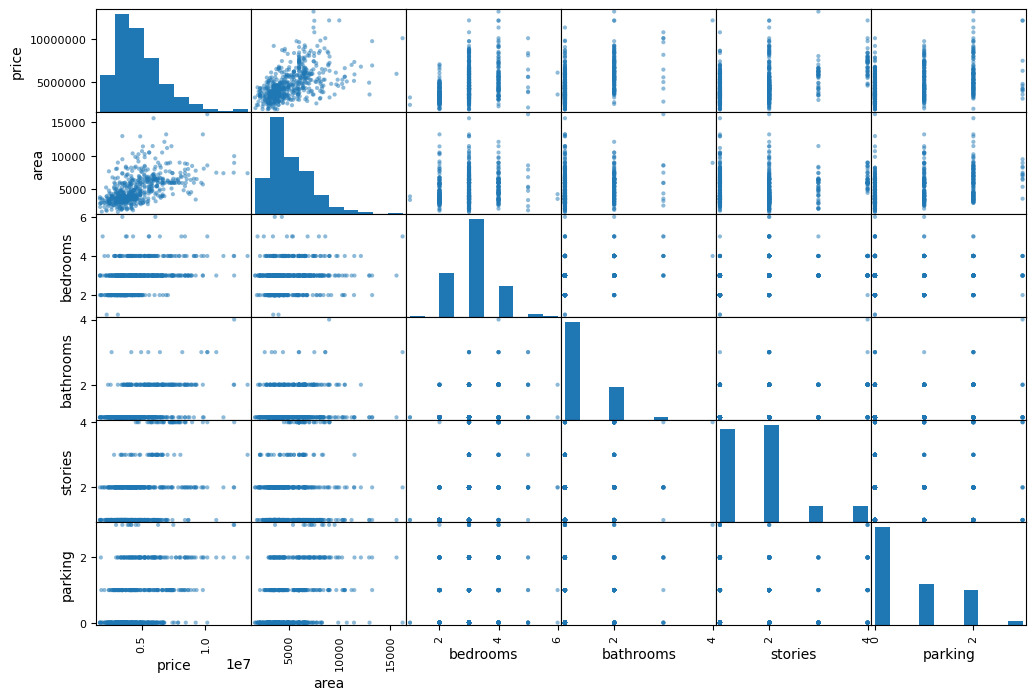

In [31]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[num_attr], figsize=(12, 8))
plt.show()

In [32]:
from sklearn.preprocessing import OrdinalEncoder

cat_attr = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
ordinal_encoder = OrdinalEncoder()
housing[cat_attr] = ordinal_encoder.fit_transform(housing[cat_attr])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0


In [ ]:
# Useless but still
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

housing_num = num_pipeline.fit_transform(housing)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set.drop('price', axis=1), train_set['price'])

print("Predictions:", lin_reg.predict(test_set.drop('price', axis=1)))

Predictions: [5203691.70963178 7257004.02115476 3062828.59668171 4559591.65374424
 3332932.30559782 3563080.67918997 5645466.31219972 6413979.66873635
 2755831.54819    2668938.66075229 9570600.29915353 2827431.50860062
 3195686.2583409  3352263.99438471 3713879.49996132 5301088.24435749
 2987920.2666968  4810799.8212371  4383031.70489929 3525092.18938646
 5796259.50068013 5840000.70299301 2760214.608641   4762590.14920607
 5204755.73895206 7515542.71619025 3254681.68956382 5236164.45964444
 8178523.16820284 3434166.15675649 6443921.58767581 3346004.77919184
 6742324.74004133 4154936.84088665 3589152.47491252 5788125.92515322
 4768370.18154077 4391684.04193172 3217657.04549935 4638196.61928878
 4522160.27786714 3541284.06127245 7238136.11941171 4021515.68926614
 3701978.76822757 4298879.55563098 6705004.0206061  3993466.52296896
 3798185.05328059 3451821.5624289  7293996.86867461 2832905.26972678
 4378698.1476993  4468002.85418353 3714623.89765883 2718466.90282779
 7524449.64983626 295

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

housing_predictions = lin_reg.predict(test_set.drop('price', axis=1))
lin_mse = mean_squared_error(test_set['price'], housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(test_set['price'], housing_predictions)
lin_rmse, lin_mae

(1331071.4167895103, 979679.6912959903)

In [38]:
test_set

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0.0,0.0,1.0,0.0,0.0,1,0.0,2.0
77,6650000,6500,3,2,3,1.0,0.0,0.0,0.0,1.0,0,1.0,0.0
360,3710000,4040,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,1.0
90,6440000,5000,3,1,2,1.0,0.0,0.0,0.0,1.0,0,0.0,1.0
493,2800000,3960,3,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,9100000,6000,4,1,2,1.0,0.0,1.0,0.0,0.0,2,0.0,1.0
357,3773000,6930,4,1,2,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
39,7910000,6000,4,2,4,1.0,0.0,0.0,0.0,1.0,1,0.0,1.0
54,7350000,6000,3,2,2,1.0,1.0,0.0,0.0,1.0,1,0.0,1.0
